In [1]:
from nearline_helpers import *
r.gSystem.Load("../lib/libdataProducts.so")

%jsroot on

Welcome to JupyROOT 6.28/04


Error in <TUnixSystem::FindDynamicLibrary>: ../lib/libunpackers.so does not exist in .:/home/rebecca/anaconda3/envs/pioneer_nearline/lib::/home/rebecca/anaconda3/envs/pioneer_nearline/lib:/home/rebecca/anaconda3/envs/pioneer_nearline/lib


In [2]:
runs = [546]# [547]#[650]#[1257]## #
indir = '../../bin/hodo-heatmap-test'
ch = load_chain(runs,indir)

ch.GetEntries()

117218

In [3]:
#create hodoscope heatmap by applying some cuts
#cuts applied: require hits in x and y, get hit with highest and second-highest amplitude in x and y separately and calculate ratio
# of second-highest ampl to highest ampl * 100. Require it to be < 90 (to make sure we have one clear hit). Require second highest 
#amplitude to not be further away than 2 channels from the channel with the highest amplitude.

#not included yet: calibration constants  
def plot_hodo_heatmap(ch, name):
    counter = 0

    histogram = r.TH2F("heatmap", f"Hodoscope Heatmap,  {name} ;hodo_x_integrals.x;hodo_y_integrals.y", 10, -5, 5, 10, -5, 5)

    for i in range(ch.GetEntries()):
        ch.GetEvent(i)
        x_pos = np.array([])
        amps = np.array([])
        y_pos = np.array([])
        amps_y = np.array([])


        for x_evt in ch.hodo_x_integrals:
            x_pos = np.append(x_pos, x_evt.x)
            amps = np.append(amps, x_evt.amplitude)

        for y_evt in ch.hodo_y_integrals:
            y_pos = np.append(y_pos, y_evt.y)

            amps_y = np.append(amps_y, y_evt.amplitude)
        
        sorted_values = np.sort(amps)[::-1]
        if len(sorted_values)> 1:

            second_highest_peak = sorted_values[1]
            highest_peak = sorted_values[0]
            second_highest_peak_ind = np.argsort(amps)[-2]
            highest_peak_ind = np.argmax(amps)
            peak_ratio_x = (second_highest_peak/highest_peak)*100
            
            channel_diff_x = abs(x_pos[np.argmax(amps)] - x_pos[np.argsort(amps)[-2]])
        if len(sorted_values)==1:

            peak_ratio_x = 0
            channel_diff_x = 0
        if len(sorted_values) < 1:
    
            peak_ratio_x = 12345 #make sure they get kicked out
            channel_diff_x = 12345

    

        sorted_values_y = np.sort(amps_y)[::-1]
        if len(sorted_values_y)> 1:
            second_highest_peak_y = sorted_values_y[1]
            highest_peak_y = sorted_values_y[0]
            #second_highest_peak_ind_y = np.argsort(amps_y)[-2]
            #highest_peak_ind_y = np.argmax(amps_y)
            peak_ratio_y = (second_highest_peak_y/highest_peak_y)*100
            channel_diff_y = abs(y_pos[np.argmax(amps_y)] - y_pos[np.argsort(amps_y)[-2]])
        if len(sorted_values_y) == 1:
            peak_ratio_y = 0
            channel_diff_y = 0

        if len(sorted_values_y) < 1:
            peak_ratio_y = 12345 #make sure they get kicked out
            channel_diff_y = 12345

        
        if peak_ratio_x < 90:
            if channel_diff_x <= 2:
                if peak_ratio_y < 90:
                    if channel_diff_y <= 2:
                    
                        histogram.Fill(x_pos[np.argmax(amps)], y_pos[np.argmax(amps_y)] )
                        counter = counter + 1
                    
    #print how many events are left after the cuts
    print(counter/ch.GetEntries())





            
    canvas_name = f"canvas"
    canvas = r.TCanvas(canvas_name, "Heatmap Canvas", 800, 600)
    canvas.cd()

    # Draw the heatmap
    canvas.Update()
    histogram.Draw("colz")

    # Show the canvas
    #canvas.Draw()
    canvas.SaveAs(f"../../bin/hodo-heatmap-test/{name}.pdf")


In [4]:
# now I want to set a cut on the amplitude to kick out noise
# therefore I first look at data from a run where we see only noise, I use run 1348

runs = [1348]# [547]#[650]#[1257]## #
indir = '../../bin/hodo-heatmap-test'
ch2 = load_chain(runs,indir)

ch2.GetEntries()

747

In [5]:
plot_hodo_heatmap(ch2, "run_1348")

0.06961178045515395


Info in <TCanvas::Print>: pdf file ../../bin/hodo-heatmap-test/run_1348.pdf has been created


In [55]:

def plot_hodo_heatmap_test(ch, name):
    counter = 0
    x_amps = np.array([])
    y_amps = np.array([])
    empty_amps_x = 0
    empty_amps_y = 0

    t0_amps = np.array([])
    t0_amps_if_amp = np.array([])



    histogram = r.TH2F("heatmap", f"Hodoscope Heatmap,  {name} ;hodo_x_integrals.x;hodo_y_integrals.y", 10, -5, 5, 10, -5, 5)

    for i in range(ch.GetEntries()):
        ch.GetEvent(i)
        x_pos = np.array([])
        amps = np.array([])
        y_pos = np.array([])
        amps_y = np.array([])


        for x_evt in ch.hodo_x_integrals:
            x_pos = np.append(x_pos, x_evt.x)
            amps = np.append(amps, x_evt.amplitude)

        for y_evt in ch.hodo_y_integrals:
            y_pos = np.append(y_pos, y_evt.y)

            amps_y = np.append(amps_y, y_evt.amplitude)
        
        """sorted_values = np.sort(amps)[::-1]
        if len(sorted_values)> 1:

            second_highest_peak = sorted_values[1]
            highest_peak = sorted_values[0]
            #second_highest_peak_ind = np.argsort(amps)[-2]
            #highest_peak_ind = np.argmax(amps)
            #peak_ratio_x = (second_highest_peak/highest_peak)*100
            
            #channel_diff_x = abs(x_pos[np.argmax(amps)] - x_pos[np.argsort(amps)[-2]])
        if len(sorted_values)==1:
            
            peak_ratio_x = 0
            channel_diff_x = 0
        if len(sorted_values) < 1:
    
            peak_ratio_x = 12345 #make sure they get kicked out
            channel_diff_x = 12345

    

        sorted_values_y = np.sort(amps_y)[::-1]
        if len(sorted_values_y)> 1:
            second_highest_peak_y = sorted_values_y[1]
            highest_peak_y = sorted_values_y[0]
            second_highest_peak_ind_y = np.argsort(amps_y)[-2]
            highest_peak_ind_y = np.argmax(amps_y)
            peak_ratio_y = (second_highest_peak_y/highest_peak_y)*100
            channel_diff_y = abs(y_pos[np.argmax(amps_y)] - y_pos[np.argsort(amps_y)[-2]])
        if len(sorted_values_y) == 1:
            peak_ratio_y = 0
            channel_diff_y = 0

        if len(sorted_values_y) < 1:
            peak_ratio_y = 12345 #make sure they get kicked out
            channel_diff_y = 12345

        
        #if peak_ratio_x < 90:
        #    if channel_diff_x <= 2:
        #        if peak_ratio_y < 90:
        #            if channel_diff_y <= 2:
        """
        try:
                    
            histogram.Fill(x_pos[np.argmax(amps)], y_pos[np.argmax(amps_y)] )
            x_amps = np.append(x_amps, max(amps))
            y_amps = np.append(y_amps, max(amps_y))



            counter = counter + 1
        except:
            if len(amps)== 0:
                empty_amps_x = empty_amps_x + 1
            if len(amps_y) == 0:
                empty_amps_y = empty_amps_y + 1
            t0_amps = np.append(t0_amps, ch.t0_integrals[0].amplitude)
            



    
    #print how many events are left after the cuts
    print(counter/ch.GetEntries())





            
    canvas_name = f"canvas"
    canvas = r.TCanvas(canvas_name, "Heatmap Canvas", 800, 600)
    canvas.cd()

    # Draw the heatmap
    canvas.Update()
    histogram.Draw("colz")

    # Show the canvas
    #canvas.Draw()
    canvas.SaveAs(f"../../bin/hodo-heatmap-test/{name}.pdf")
    print(empty_amps_x, empty_amps_y)
    return x_amps, y_amps, t0_amps

x_amps, y_amps, t0_amps = plot_hodo_heatmap_test(ch2, "run_1348_no_cuts")

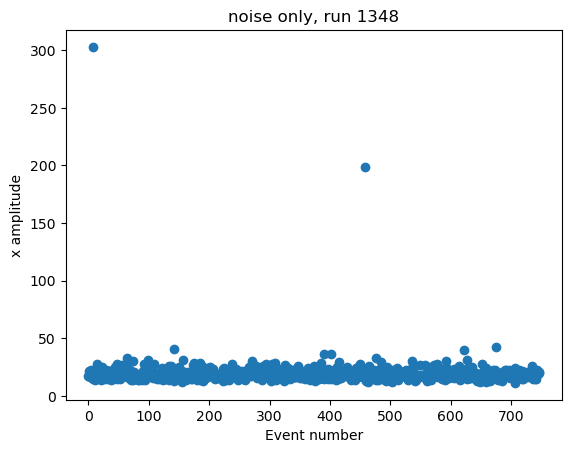

In [7]:
x = np.linspace(0, 747, 747)
plt.scatter(x,x_amps)
plt.title("noise only, run 1348")
plt.xlabel('Event number')
plt.ylabel("x amplitude")
pass

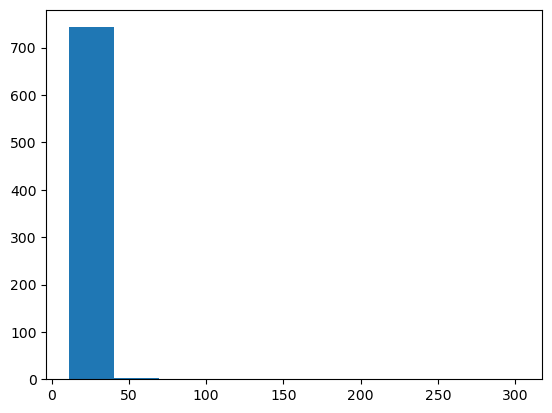

In [8]:
plt.hist(x_amps)
pass

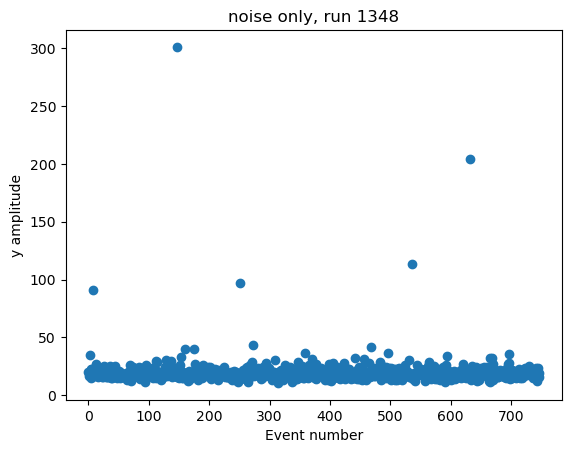

In [9]:
y = np.linspace(0, 747, 747)
plt.scatter(y,y_amps)
plt.title("noise only, run 1348")
plt.xlabel('Event number')
plt.ylabel("y amplitude")
pass

In [66]:
#now compare this to data that includes signal + beam
#use run 1208
runs = [1208]# [547]#[650]#[1257]## #
indir = '../../bin/hodo-heatmap-test'
ch3 = load_chain(runs,indir)

ch3.GetEntries()

23603

In [12]:
x_amps, y_amps = plot_hodo_heatmap_test(ch3, "run_1208_no_cuts")


1.0
0 0


Info in <TCanvas::Print>: pdf file ../../bin/hodo-heatmap-test/run_1208_no_cuts.pdf has been created


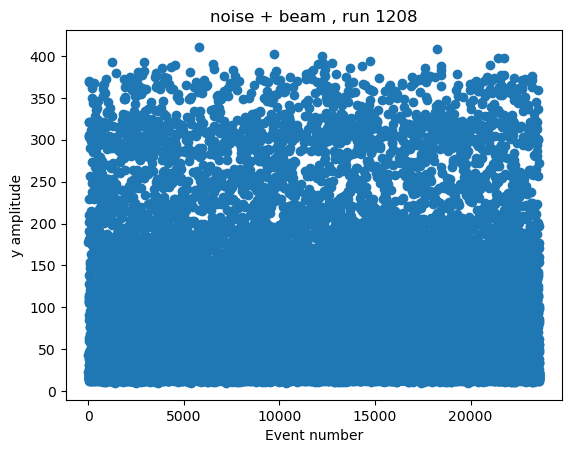

In [13]:
y = np.linspace(0, 23603, 23603)
plt.scatter(y,y_amps)
plt.title("noise + beam , run 1208")
plt.xlabel('Event number')
plt.ylabel("y amplitude")
pass

(array([12965.,  1851.,  1933.,  1891.,  1312.,   931.,   612.,   694.,
         1021.,   393.]),
 array([  9.46666667,  49.52      ,  89.57333333, 129.62666667,
        169.68      , 209.73333333, 249.78666667, 289.84      ,
        329.89333333, 369.94666667, 410.        ]),
 <BarContainer object of 10 artists>)

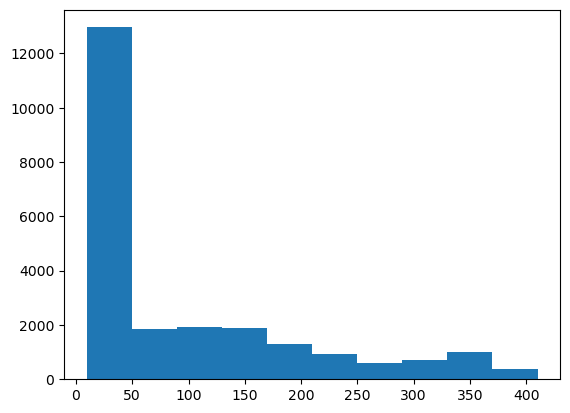

In [14]:
plt.hist(x_amps)

In [105]:
def plot_hodo_heatmap_cut_noise(ch, name):
    counter = 0
    x_amps = np.array([])
    y_amps = np.array([])

    histogram = r.TH2F("heatmap", f"Hodoscope Heatmap,  {name} ;hodo_x_integrals.x;hodo_y_integrals.y", 10, -5, 5, 10, -5, 5)

    for i in range(ch.GetEntries()):
        ch.GetEvent(i)
        x_pos = np.array([])
        amps = np.array([])
        y_pos = np.array([])
        amps_y = np.array([])


        #for x_evt in ch.hodo_x_integrals:
        for x_evt in ch.hodo_x_integrals_calibrated:

            x_pos = np.append(x_pos, x_evt.x)
            amps = np.append(amps, x_evt.amplitude)

        #for y_evt in ch.hodo_y_integrals:
        for y_evt in ch.hodo_y_integrals_calibrated:

            y_pos = np.append(y_pos, y_evt.y)

            amps_y = np.append(amps_y, y_evt.amplitude)
        
        """sorted_values = np.sort(amps)[::-1]
        if len(sorted_values)> 1:

            second_highest_peak = sorted_values[1]
            highest_peak = sorted_values[0]
            second_highest_peak_ind = np.argsort(amps)[-2]
            highest_peak_ind = np.argmax(amps)
            peak_ratio_x = (second_highest_peak/highest_peak)*100
            
            channel_diff_x = abs(x_pos[np.argmax(amps)] - x_pos[np.argsort(amps)[-2]])
        if len(sorted_values)==1:
            
            peak_ratio_x = 0
            channel_diff_x = 0
        if len(sorted_values) < 1:
    
            peak_ratio_x = 12345 #make sure they get kicked out
            channel_diff_x = 12345

    

        sorted_values_y = np.sort(amps_y)[::-1]
        if len(sorted_values_y)> 1:
            second_highest_peak_y = sorted_values_y[1]
            highest_peak_y = sorted_values_y[0]
            second_highest_peak_ind_y = np.argsort(amps_y)[-2]
            highest_peak_ind_y = np.argmax(amps_y)
            peak_ratio_y = (second_highest_peak_y/highest_peak_y)*100
            channel_diff_y = abs(y_pos[np.argmax(amps_y)] - y_pos[np.argsort(amps_y)[-2]])
        if len(sorted_values_y) == 1:
            peak_ratio_y = 0
            channel_diff_y = 0

        if len(sorted_values_y) < 1:
            peak_ratio_y = 12345 #make sure they get kicked out
            channel_diff_y = 12345

        
        #if peak_ratio_x < 90:
        #    if channel_diff_x <= 2:
        #        if peak_ratio_y < 90:
        #            if channel_diff_y <= 2:
        """
        if (max(amps) > 20) and (max(amps_y)) > 20:
            histogram.Fill(x_pos[np.argmax(amps)], y_pos[np.argmax(amps_y)] )
            x_amps = np.append(x_amps, max(amps))
            y_amps = np.append(y_amps, max(amps_y))

            counter = counter + 1
    
    #print how many events are left after the cuts
    print(counter/ch.GetEntries())





            
    canvas_name = f"canvas"
    canvas = r.TCanvas(canvas_name, "Heatmap Canvas", 800, 600)
    canvas.cd()

    # Draw the heatmap
    canvas.Update()
    histogram.Draw("colz")

    # Show the canvas
    #canvas.Draw()
    canvas.SaveAs(f"../../bin/hodo-heatmap-test/{name}.pdf")
    return x_amps, y_amps

x_amps, y_amps = plot_hodo_heatmap_cut_noise(ch3, "run_1208_noise_cut_calibrated")

0.5070541880269457


Warning in <TROOT::Append>: Replacing existing TH1: heatmap (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ../../bin/hodo-heatmap-test/run_1208_noise_cut_calibrated.pdf has been created


In [24]:
x_amps, y_amps = plot_hodo_heatmap_cut_noise(ch2, "run_1348_noise_cuts")


0.11244979919678715


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ../../bin/hodo-heatmap-test/run_1348_noise_cuts.pdf has been created


In [16]:
#now compare this to data that includes signal + beam and data at places where there is no channel - need to figure out what is happening there
#use run 1208
runs = [1100]# [547]#[650]#[1257]## #
indir = '../../bin/hodo-heatmap-test'
ch4 = load_chain(runs,indir)

ch4.GetEntries()

34273

In [57]:
x_amps, y_amps, t0_amps, t0_amps_if_sig = plot_hodo_heatmap_test(ch4, "run_1100_no_cut")


0.632480378140227
9829 4862


Info in <TCanvas::Print>: pdf file ../../bin/hodo-heatmap-test/run_1100_no_cut.pdf has been created


In [37]:
#just for testing on how to get T0 amplitude
t0_amps = np.array([])
for i in range(ch4.GetEntries()):
    ch4.GetEvent(i)
    
    t0_amps = np.append(t0_amps, ch4.t0_integrals[0].amplitude)


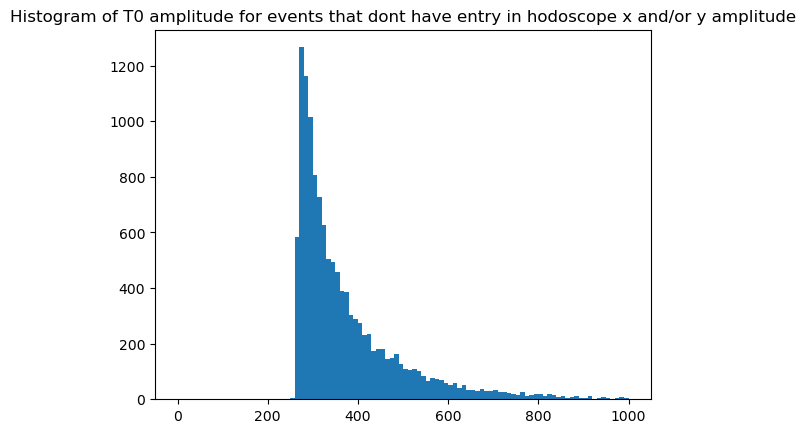

In [59]:
plt.hist(t0_amps, bins = 100, range=(0, 1000))
plt.title('Histogram of T0 amplitude for events that dont have entry in hodoscope x and/or y amplitude')
pass

In [52]:
min(t0_amps)

258.0

In [63]:
def plot_hodo_heatmap_test(ch, name):
    counter = 0
    x_amps = np.array([])
    y_amps = np.array([])
    empty_amps_x = 0
    empty_amps_y = 0

    t0_amps = np.array([])
    t0_amps_if_amp = np.array([])



    histogram = r.TH2F("heatmap", f"Hodoscope Heatmap,  {name} ;hodo_x_integrals.x;hodo_y_integrals.y", 10, -5, 5, 10, -5, 5)

    for i in range(ch.GetEntries()):
        ch.GetEvent(i)
        x_pos = np.array([])
        amps = np.array([])
        y_pos = np.array([])
        amps_y = np.array([])


        for x_evt in ch.hodo_x_integrals:
            x_pos = np.append(x_pos, x_evt.x)
            amps = np.append(amps, x_evt.amplitude)

        for y_evt in ch.hodo_y_integrals:
            y_pos = np.append(y_pos, y_evt.y)

            amps_y = np.append(amps_y, y_evt.amplitude)
        
        """sorted_values = np.sort(amps)[::-1]
        if len(sorted_values)> 1:

            second_highest_peak = sorted_values[1]
            highest_peak = sorted_values[0]
            second_highest_peak_ind = np.argsort(amps)[-2]
            highest_peak_ind = np.argmax(amps)
            peak_ratio_x = (second_highest_peak/highest_peak)*100
            
            channel_diff_x = abs(x_pos[np.argmax(amps)] - x_pos[np.argsort(amps)[-2]])
        if len(sorted_values)==1:
            
            peak_ratio_x = 0
            channel_diff_x = 0
        if len(sorted_values) < 1:
    
            peak_ratio_x = 12345 #make sure they get kicked out
            channel_diff_x = 12345

    

        sorted_values_y = np.sort(amps_y)[::-1]
        if len(sorted_values_y)> 1:
            second_highest_peak_y = sorted_values_y[1]
            highest_peak_y = sorted_values_y[0]
            second_highest_peak_ind_y = np.argsort(amps_y)[-2]
            highest_peak_ind_y = np.argmax(amps_y)
            peak_ratio_y = (second_highest_peak_y/highest_peak_y)*100
            channel_diff_y = abs(y_pos[np.argmax(amps_y)] - y_pos[np.argsort(amps_y)[-2]])
        if len(sorted_values_y) == 1:
            peak_ratio_y = 0
            channel_diff_y = 0
        

        if len(sorted_values_y) < 1:
            peak_ratio_y = 12345 #make sure they get kicked out
            channel_diff_y = 12345

        
        #if peak_ratio_x < 90:
        #    if channel_diff_x <= 2:
        #        if peak_ratio_y < 90:
        #            if channel_diff_y <= 2:
        """
        try:
                    
            histogram.Fill(x_pos[np.argmax(amps)], y_pos[np.argmax(amps_y)] )
            x_amps = np.append(x_amps, max(amps))
            y_amps = np.append(y_amps, max(amps_y))

            t0_amps_if_amp = np.append(t0_amps_if_amp, ch.t0_integrals[1].amplitude)


            counter = counter + 1
        except:
            if len(amps)== 0:
                empty_amps_x = empty_amps_x + 1
            if len(amps_y) == 0:
                empty_amps_y = empty_amps_y + 1
            t0_amps = np.append(t0_amps, ch.t0_integrals[1].amplitude)
            



    
    #print how many events are left after the cuts
    print(counter/ch.GetEntries())





            
    canvas_name = f"canvas"
    canvas = r.TCanvas(canvas_name, "Heatmap Canvas", 800, 600)
    canvas.cd()

    # Draw the heatmap
    canvas.Update()
    histogram.Draw("colz")

    
    #print how many events are left after the cuts
    print(counter/ch.GetEntries())



    # Show the canvas
    #canvas.Draw()
    canvas.SaveAs(f"../../bin/hodo-heatmap-test/{name}.pdf")
    print(empty_amps_x, empty_amps_y)
    return x_amps, y_amps, t0_amps, t0_amps_if_amp

x_amps, y_amps, t0_amps, t0_amps_if_amp = plot_hodo_heatmap_test(ch4, "test")

0.632480378140227
0.632480378140227
9829 4862


Info in <TCanvas::Print>: pdf file ../../bin/hodo-heatmap-test/test.pdf has been created


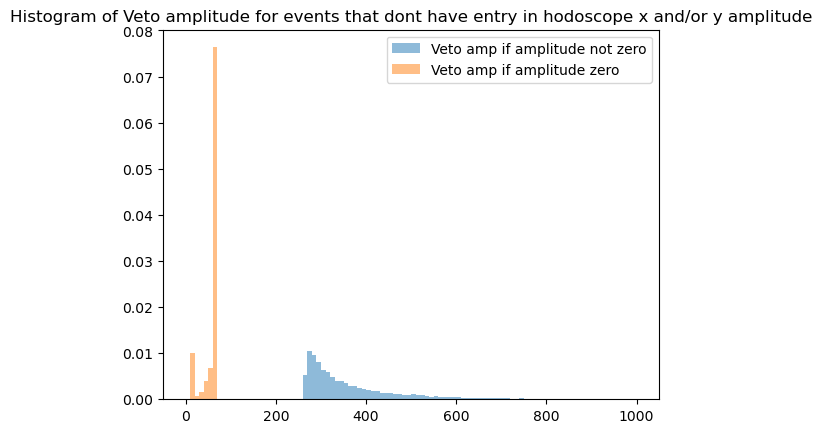

In [65]:
plt.hist(t0_amps_if_sig, bins = 100, range=(0,1000), alpha=0.5,density=True, label="Veto amp if amplitude not zero")
plt.hist(t0_amps, bins = 100, range=(0,1000), alpha=0.5,density=True, label="Veto amp if amplitude zero")
plt.legend()

plt.title('Histogram of Veto amplitude for events that dont have entry in hodoscope x and/or y amplitude')
pass

In [ ]:
#TO DO
# - look at waveforms in very bright part of heatmap of run 1208
# - add calibration constants and then check if noise cut changes. look at integral instead of amplitude 




In [121]:
c = r.TCanvas()
ch3.Draw("hodo_x_integrals.integral","hodo_x_integrals.x == 3.5","colz")
#c.SetLogy()
c.Draw()
pass

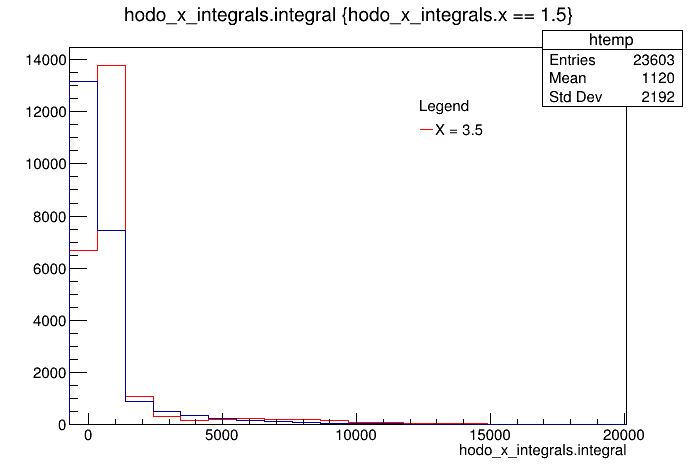

In [5]:
c = r.TCanvas()
ch3.Draw("hodo_x_integrals.integral","hodo_x_integrals.x == 1.5","colz")
hodo_x_integrals = ch3.GetHistogram()
hodo_x_integrals.GetXaxis().SetRangeUser(0, 20*10**3)

hodo_x_integrals2 = ch3.GetHistogram()
hodo_x_integrals2.GetXaxis().SetRangeUser(0, 20 * 10**3)
hodo_x_integrals2.SetLineColor(r.kRed)
ch3.Draw("hodo_x_integrals.integral", "hodo_x_integrals.x == 3.5", "colz same")

# Create a legend
legend = r.TLegend(0.6, 0.7, 0.7, 0.8)
legend.SetHeader("Legend")
#legend.AddEntry(hodo_x_integrals, "X = 1.5", "l")
legend.AddEntry(hodo_x_integrals2, "X = 3.5", "l")
legend.SetBorderSize(0)  # optional: remove border
legend.Draw()

c.Draw()
pass

In [45]:
from nearline_helpers import *
r.gSystem.Load("../lib/libdataProducts.so")

%jsroot on

#now compare this to data that includes signal + beam
#use run 1208
runs = [1208]# [547]#[650]#[1257]## #
indir = '../../bin/hodo-heatmap-test'
ch3 = load_chain(runs,indir)

#ch3.GetEntries()
ch3.GetEntry(0)
ch3.hodo_x_waveforms.size()

7

7
7
18
31


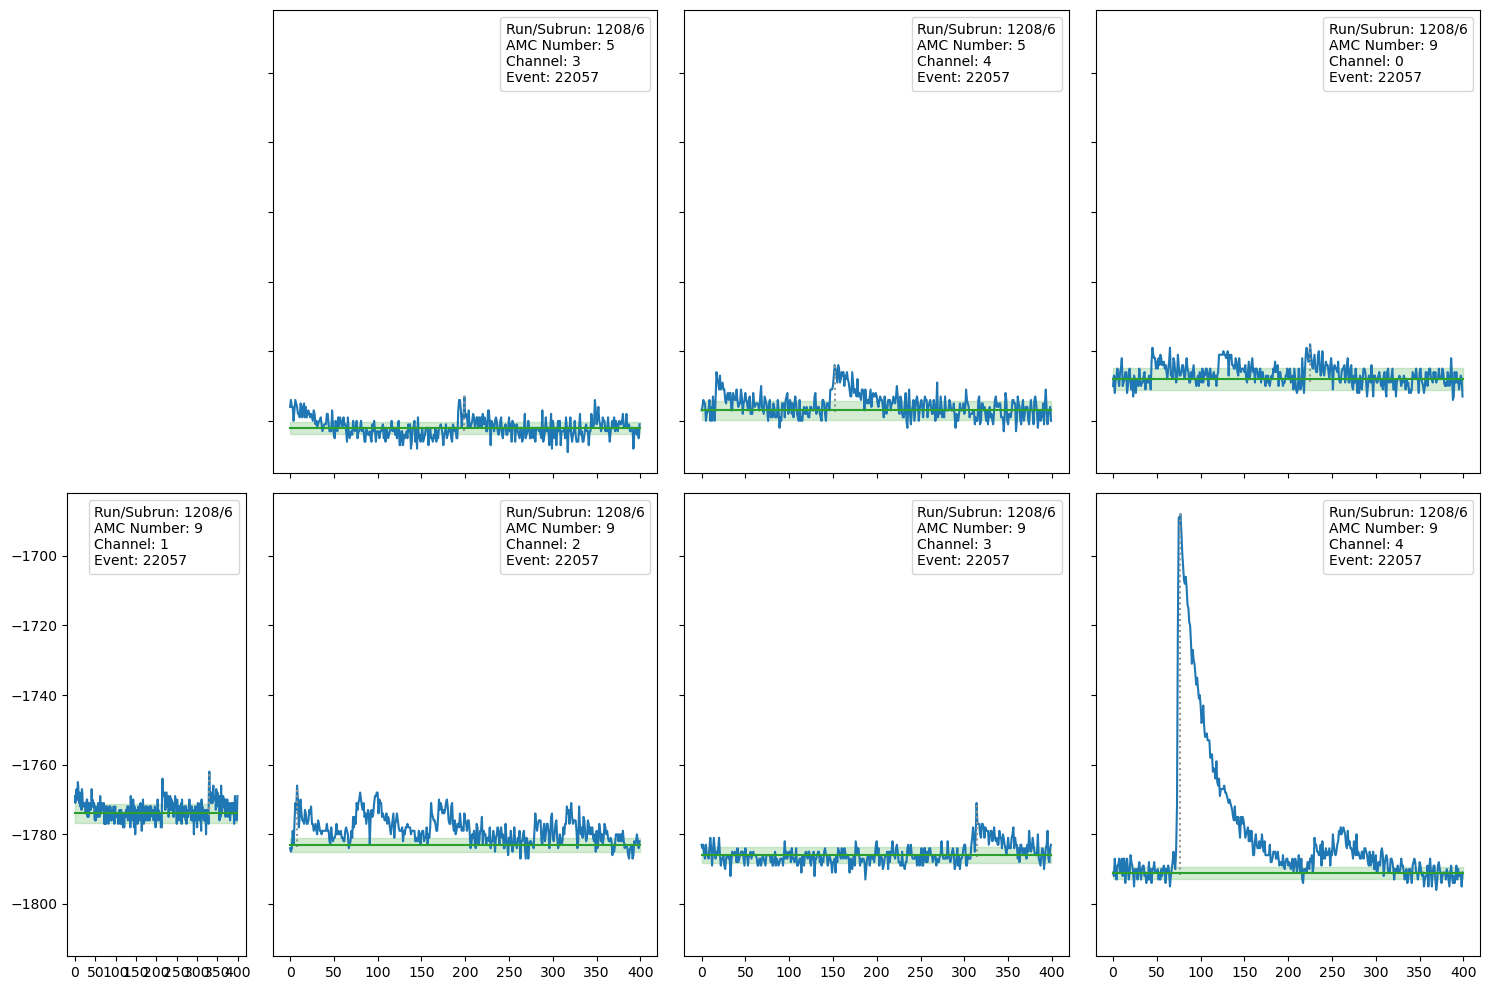

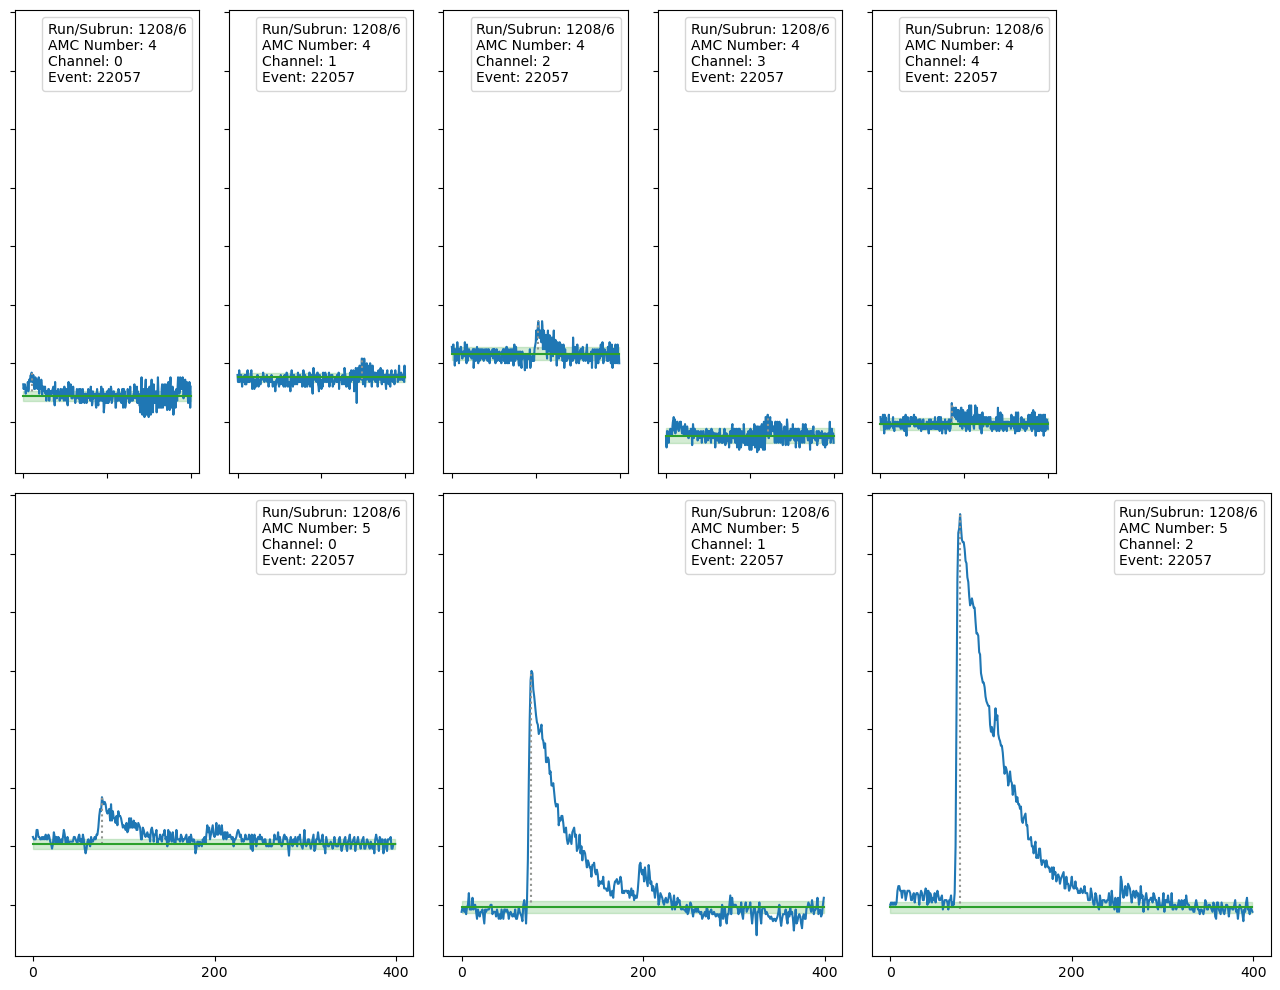

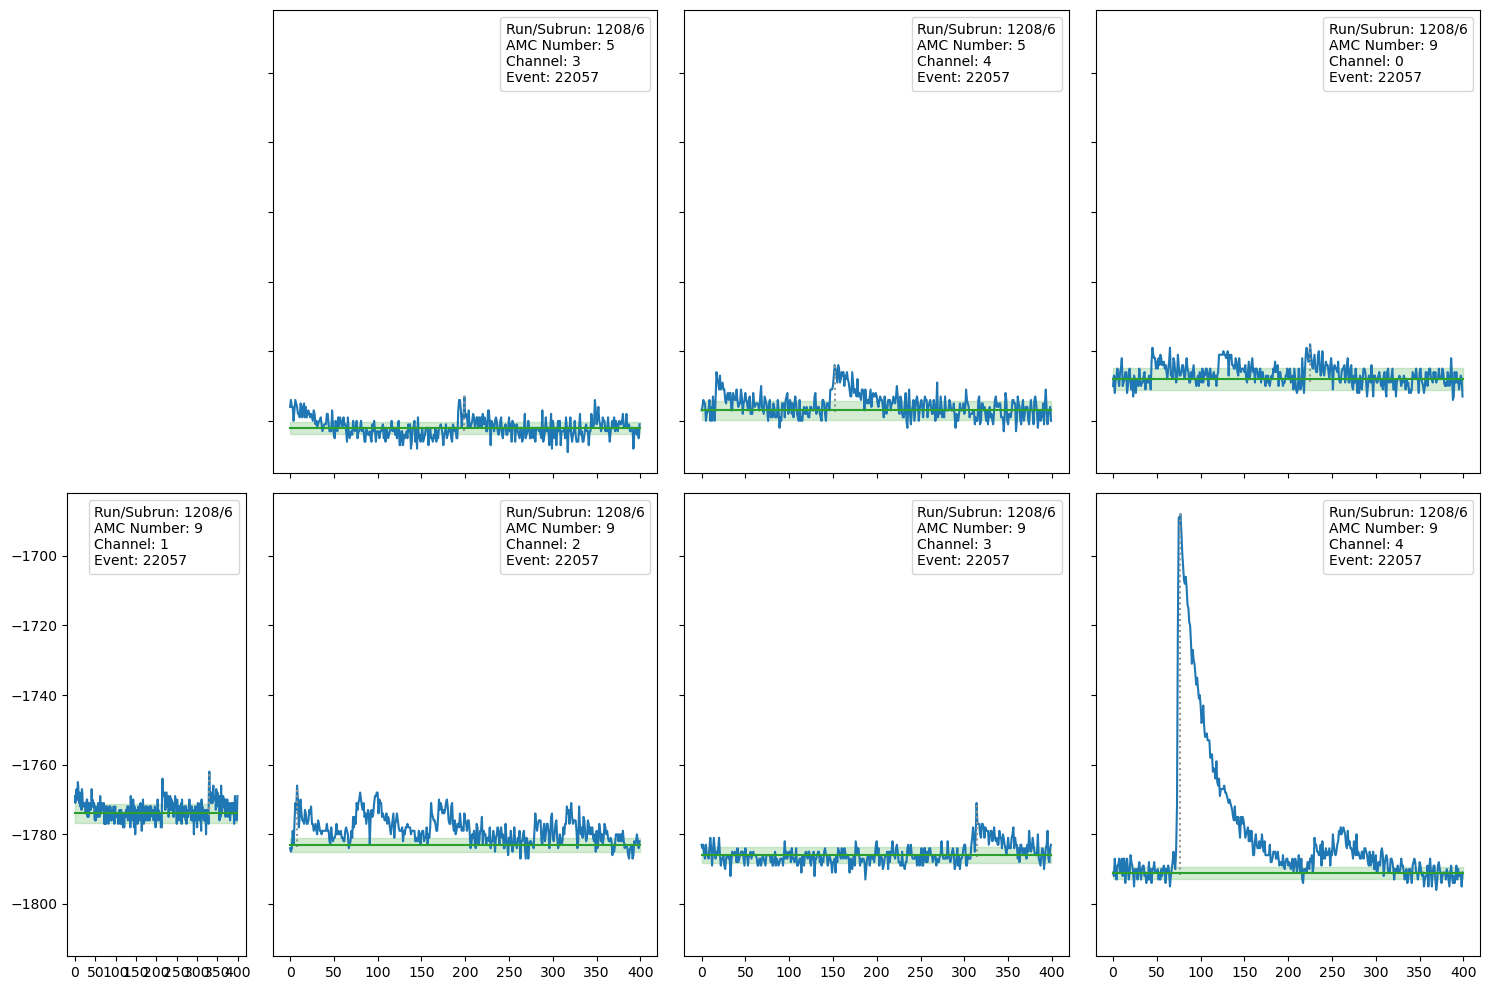

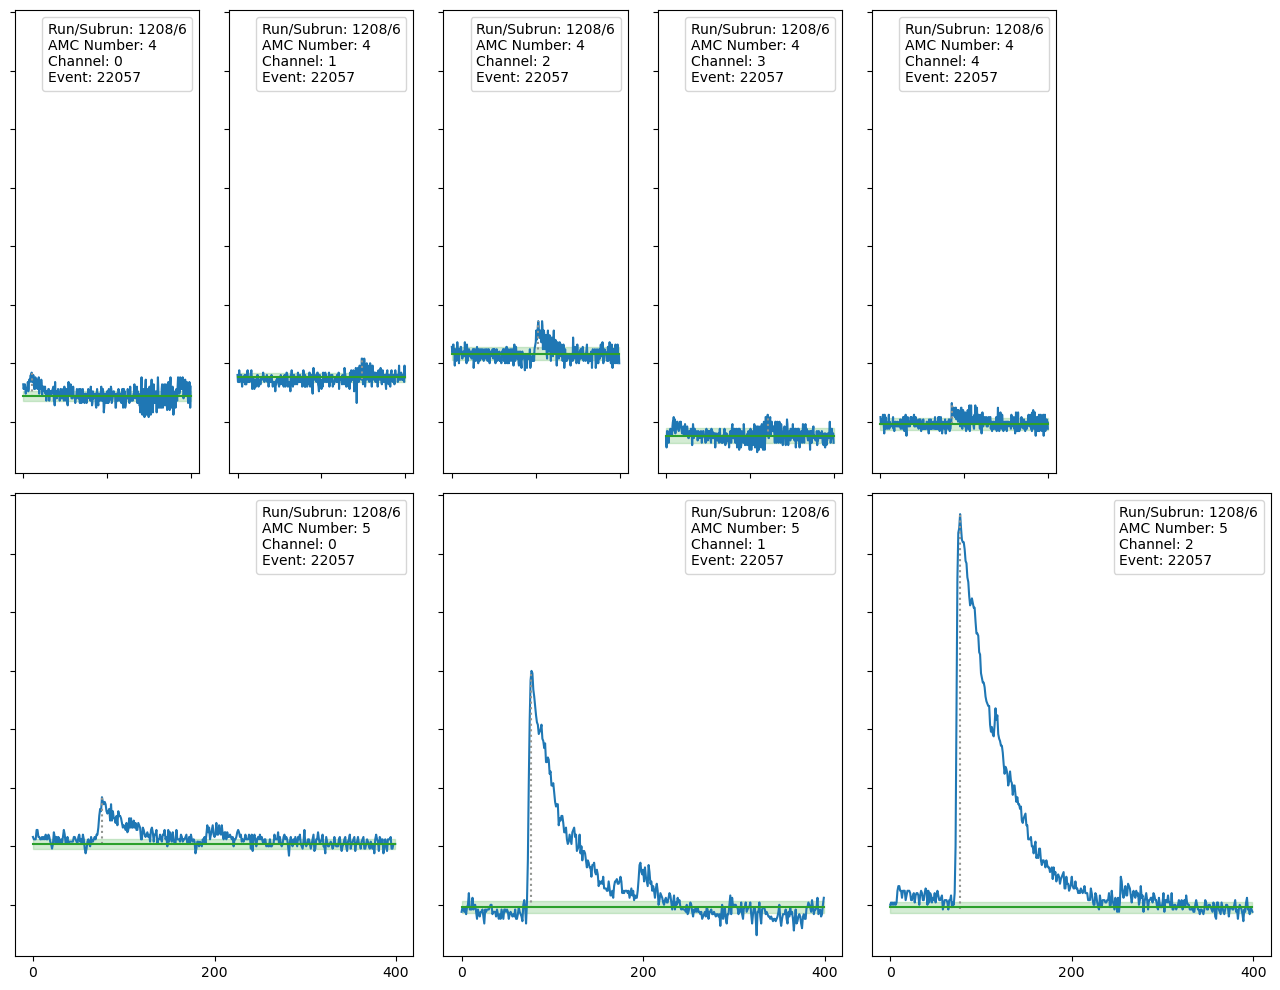

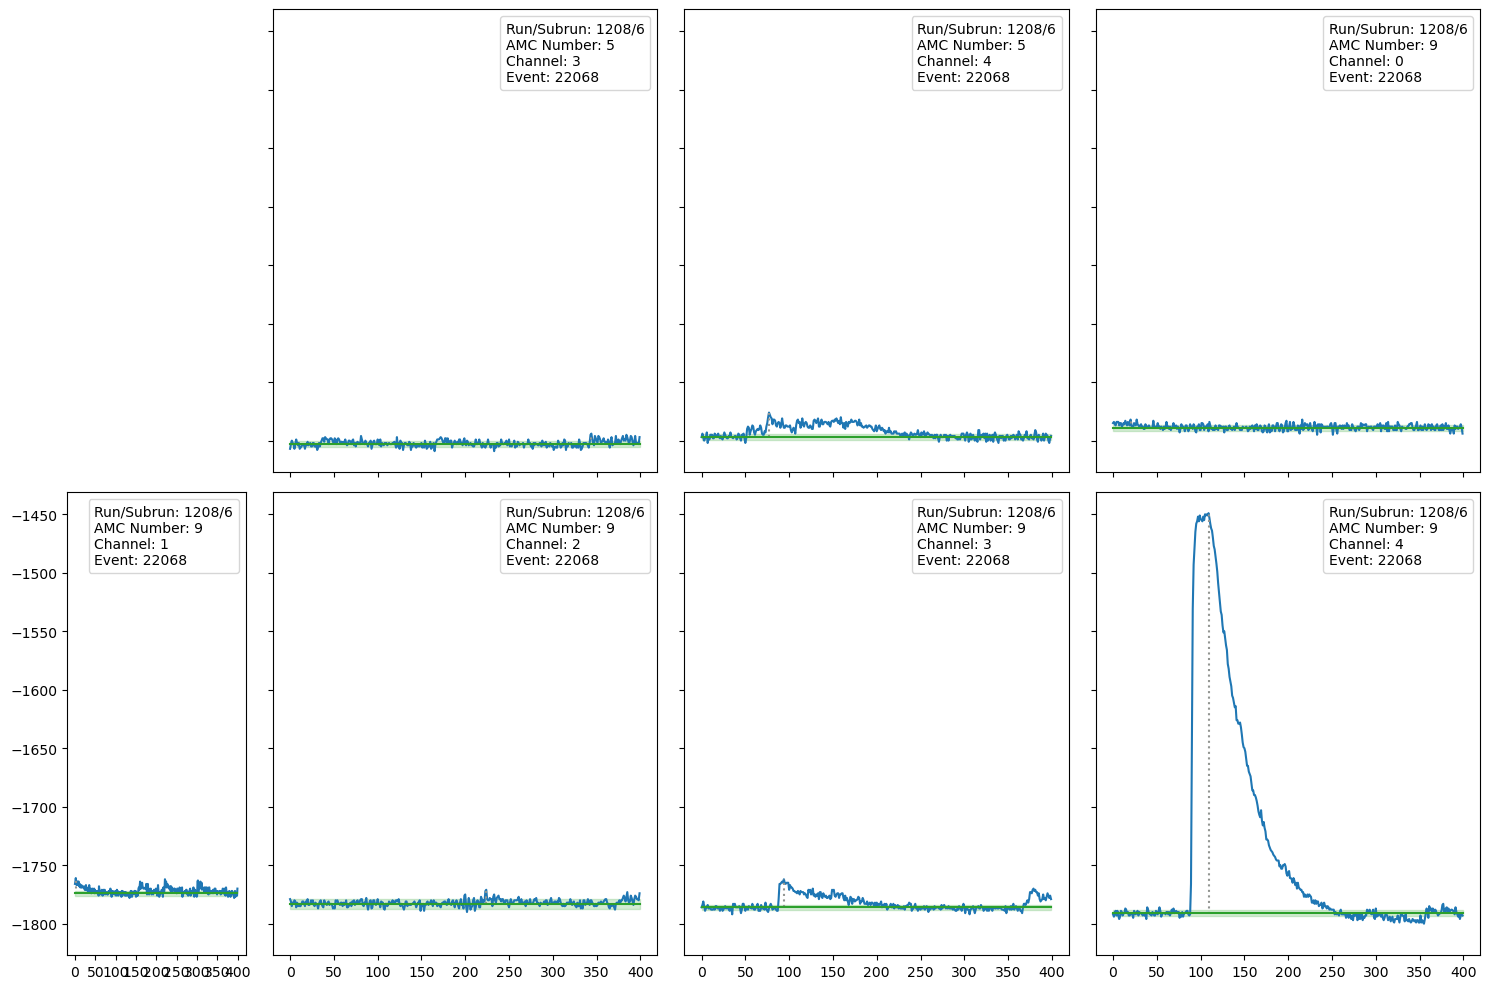

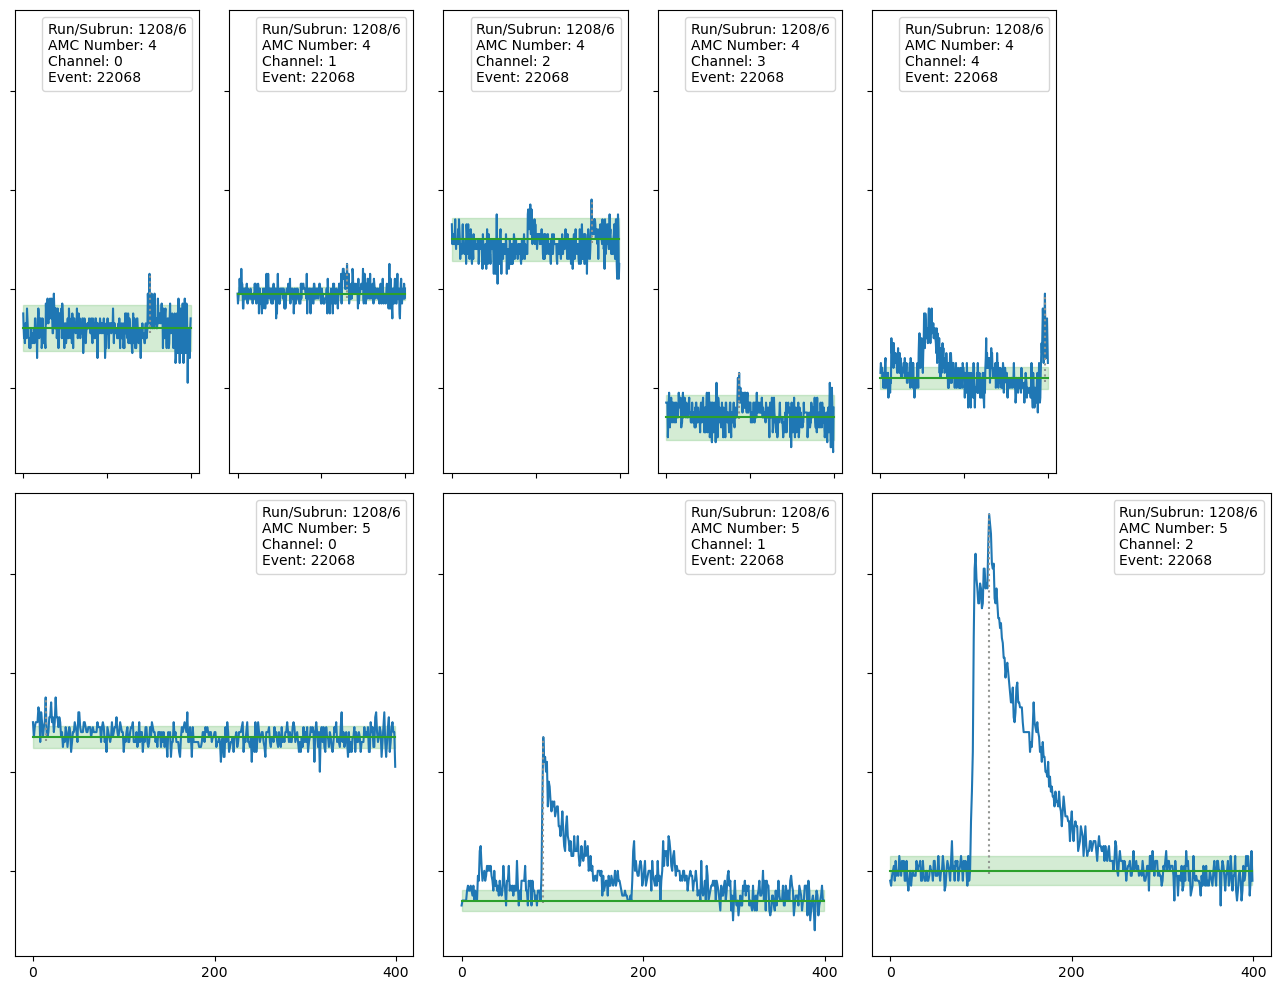

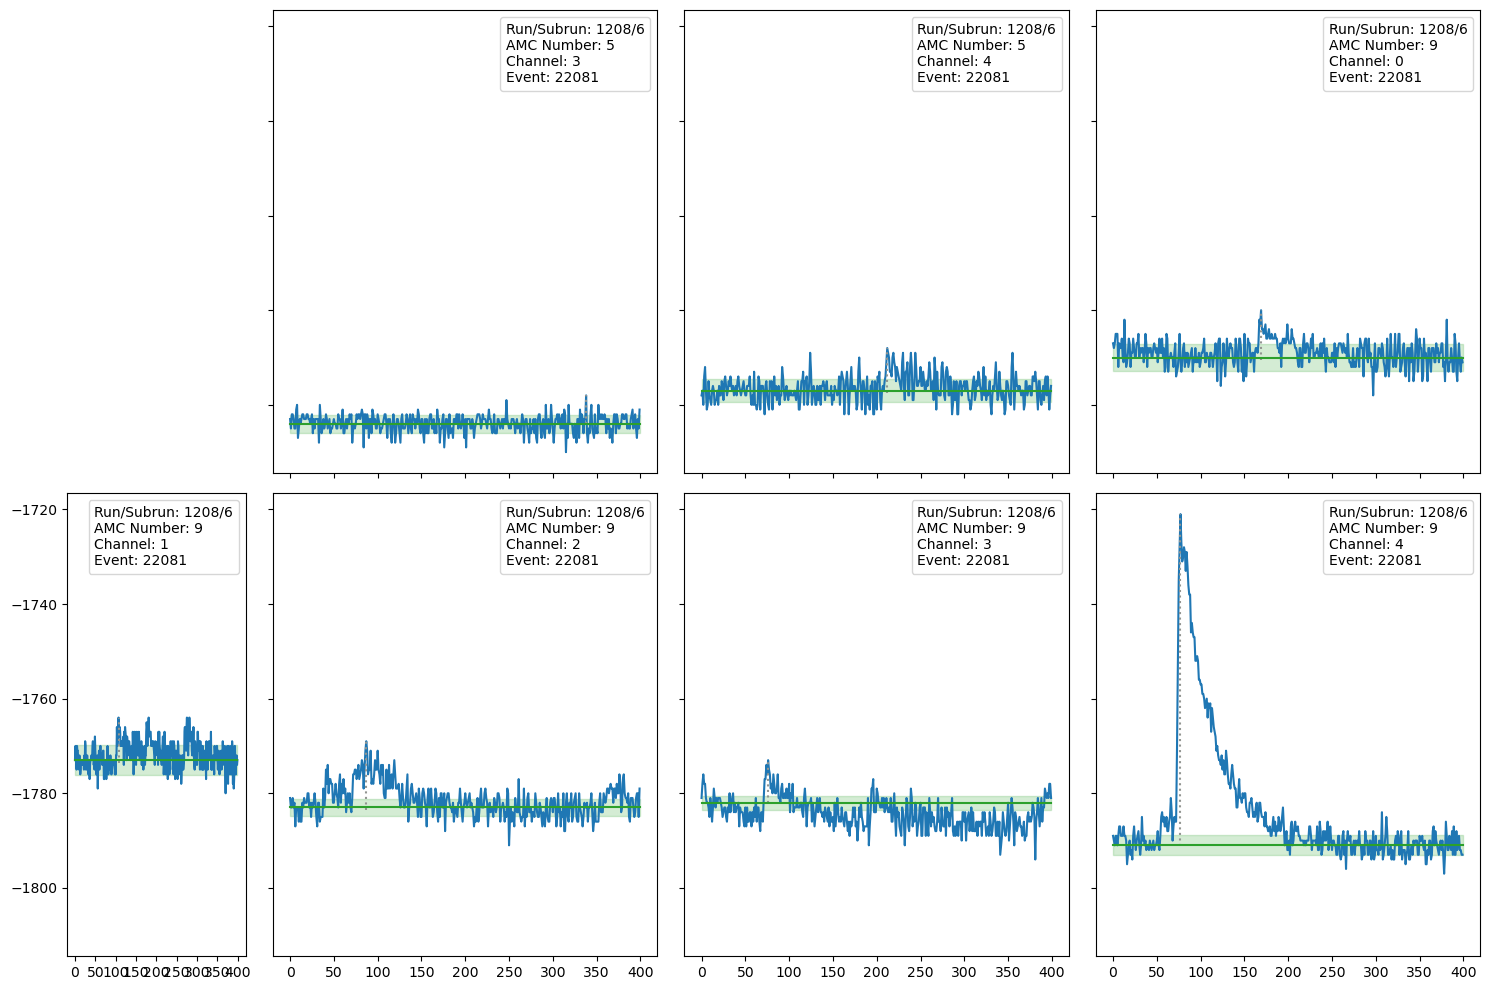

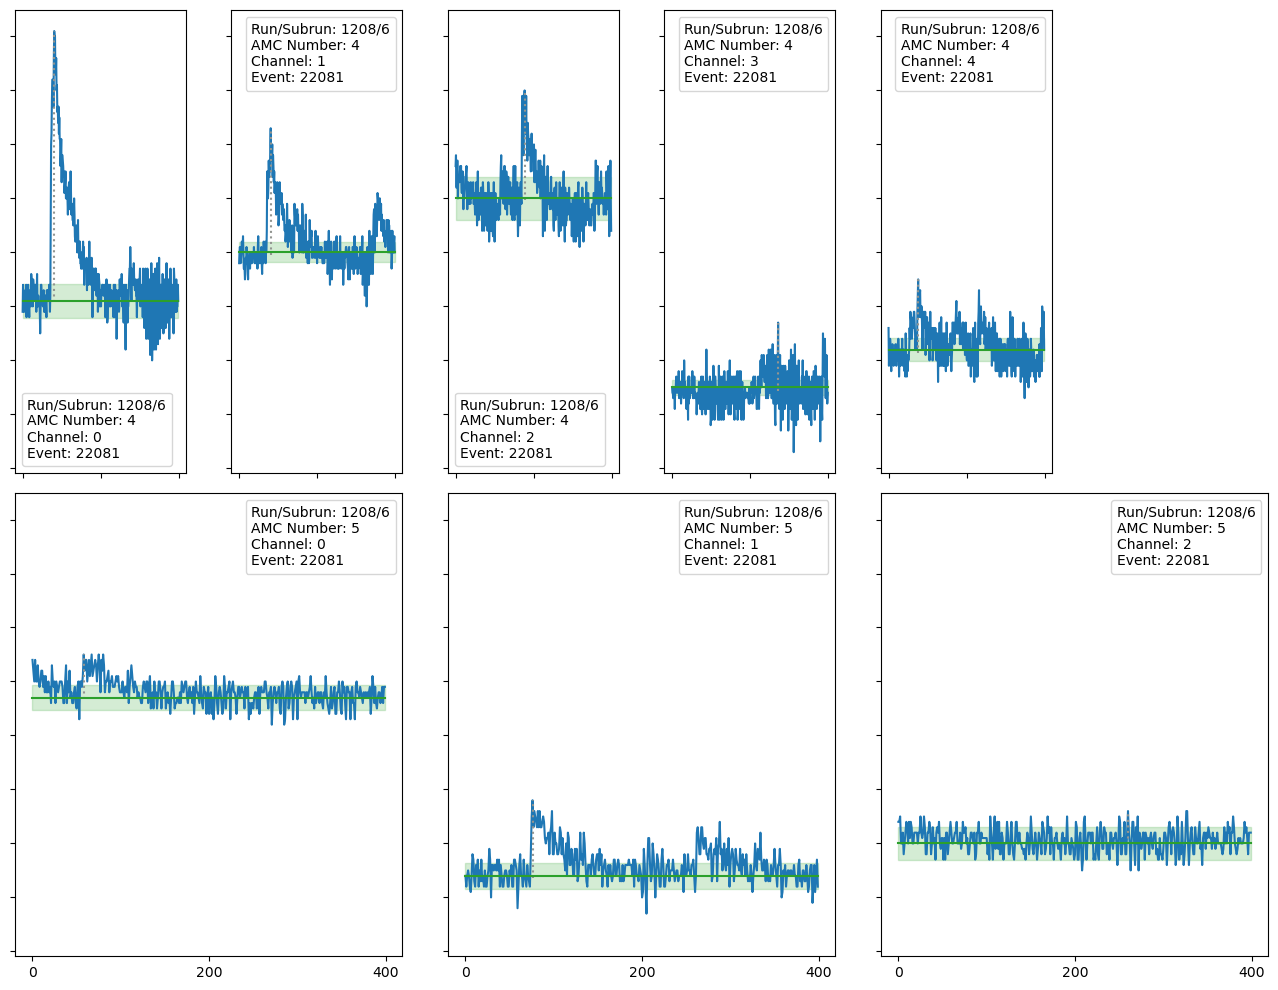

In [40]:
#look at waveform for some events
hodo_channel_map_x = {
    
    (5,3):'A',
    (5,4):'B',
    (9,0):'C',
    (9,1):'D',
    (9,2):'E',
    (9,3):'F',
    (9,4):'G', # look here
    #(0,0):'K',

}
hodo_channel_map_y = {
    
   
    (4,0):'A',
    (4,1):'B',
    (4,2):'C',
    (4,3):'D',
    (4,4):'E',
    (5,0):'F',
    (5,1):'G',
    (5,2):'H', # look here
    #(0,0):'K',
  
    

}
layout_string_hodo_x = '.AABBCC\nDEEFFGG'
layout_string_hodo_y = '.ABCDE.\n.FFGGHH'
for i in range(35) :

    ch3.GetEntry(i)
    for x_evt in ch3.hodo_x_integrals:
        for y_evt in ch3.hodo_y_integrals:
            

            if (x_evt.amplitude > 50 ) and (y_evt.amplitude > 50 ) and (x_evt.amcNum == 9) and (x_evt.channelTag == 4):


                plot_event_wf(ch3.hodo_x_waveforms,channel_map=hodo_channel_map_x, layout=layout_string_hodo_x)
                plot_event_wf(ch3.hodo_y_waveforms,channel_map=hodo_channel_map_y, layout=layout_string_hodo_y)
                print(i)

        pass

In [52]:
def plot_hodo_heatmap_cut_noise_with_integral(ch, name):
    counter = 0
    x_amps = np.array([])
    y_amps = np.array([])

    histogram = r.TH2F("heatmap", f"Hodoscope Heatmap,  {name} ;hodo_x_integrals.x;hodo_y_integrals.y", 10, -5, 5, 10, -5, 5)

    for i in range(ch.GetEntries()):
        ch.GetEvent(i)
        x_pos = np.array([])
        amps = np.array([])
        y_pos = np.array([])
        amps_y = np.array([])


        #for x_evt in ch.hodo_x_integrals:
        for x_evt in ch.hodo_x_integrals_calibrated:

            x_pos = np.append(x_pos, x_evt.x)
            amps = np.append(amps, x_evt.integral)

        #for y_evt in ch.hodo_y_integrals:
        for y_evt in ch.hodo_y_integrals_calibrated:

            y_pos = np.append(y_pos, y_evt.y)

            amps_y = np.append(amps_y, y_evt.integral)

        if (max(amps) > 700) and (max(amps_y)) > 700:
            #print(max(amps))
            histogram.Fill(x_pos[np.argmax(amps)], y_pos[np.argmax(amps_y)] )
            x_amps = np.append(x_amps, max(amps))
            y_amps = np.append(y_amps, max(amps_y))

            counter = counter + 1
    
    #print how many events are left after the cuts
    print(counter/ch.GetEntries())

    canvas_name = f"canvas"
    canvas = r.TCanvas(canvas_name, "Heatmap Canvas", 800, 600)
    canvas.cd()

    # Draw the heatmap
    canvas.Update()
    histogram.Draw("colz")

    # Show the canvas
    #canvas.Draw()
    canvas.SaveAs(f"../../bin/hodo-heatmap-test/{name}.pdf")
    return x_amps, y_amps

x_amps, y_amps = plot_hodo_heatmap_cut_noise_with_integral(ch3, "run_1208_noise_cut_integral")

0.5107825276447909


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ../../bin/hodo-heatmap-test/run_1208_noise_cut_integral.pdf has been created


In [53]:
#add calibration
hodo_x = np.array([-4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
calib_const_x = np.array([1.0, 1.040297882, 1.018362746, 1.08965123, 1.0, 1.067348807, 1.032482949, 1.061229039, 0.9655564687, 1.060473398, 1.0])
hodo_y = np.array([-5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
calib_const_y = np.array([ 1.0, 1.055717366, 1.03137674,  1.029529993,  1.05013265, 1.0612033, 1.058853069,1.017718497, 1.059953014, 1.055132587, 1.072737713, 1.0 ])

def plot_hodo_heatmap_cut_noise_with_integral(ch, name):
    counter = 0
    x_amps = np.array([])
    y_amps = np.array([])

    histogram = r.TH2F("heatmap", f"Hodoscope Heatmap,  {name} ;hodo_x_integrals.x;hodo_y_integrals.y", 10, -5, 5, 10, -5, 5)

    for i in range(ch.GetEntries()):
        ch.GetEvent(i)
        x_pos = np.array([])
        amps = np.array([])
        y_pos = np.array([])
        amps_y = np.array([])


        #for x_evt in ch.hodo_x_integrals:
        #it says hodo_x_integrals_calibrated, but in run 1208 it's actually not calibrated yet -> need to add this by hand
        for x_evt in ch.hodo_x_integrals_calibrated:

            x_pos = np.append(x_pos, x_evt.x)
            index = np.where(hodo_x == x_evt.x)[0]
            amps = np.append(amps, x_evt.integral*calib_const_x[index])

        #for y_evt in ch.hodo_y_integrals:
        for y_evt in ch.hodo_y_integrals_calibrated:

            y_pos = np.append(y_pos, y_evt.y)
            index = np.where(hodo_y == y_evt.y)[0]

            amps_y = np.append(amps_y, y_evt.integral*calib_const_y[index])

        if (max(amps) > 700) and (max(amps_y)) > 700:
            #print(max(amps))
            histogram.Fill(x_pos[np.argmax(amps)], y_pos[np.argmax(amps_y)] )
            x_amps = np.append(x_amps, max(amps))
            y_amps = np.append(y_amps, max(amps_y))
            counter = counter + 1
    
    #print how many events are left after the cuts
    print(counter/ch.GetEntries())

    canvas_name = f"canvas"
    canvas = r.TCanvas(canvas_name, "Heatmap Canvas", 800, 600)
    canvas.cd()

    # Draw the heatmap
    canvas.Update()
    histogram.Draw("colz")

    # Show the canvas
    #canvas.Draw()
    canvas.SaveAs(f"../../bin/hodo-heatmap-test/{name}.pdf")
    return x_amps, y_amps

x_amps, y_amps = plot_hodo_heatmap_cut_noise_with_integral(ch3, "run_1208_noise_cut_integral_calibrated")

0.5362453925348473


Info in <TCanvas::Print>: pdf file ../../bin/hodo-heatmap-test/run_1208_noise_cut_integral_calibrated.pdf has been created


In [ ]:
#oder neue Daten schauen, dann neue hodo map und veto in extra leaf. Wie verändert sich beamspot mit energie? 50-70 etc MeV
#1623/24 noise cut anlegen, was ändert sich

#look at new data to see how beamspot changes with energy
